# 0. Instalacion de utilitarios Pyspark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.3.4/spark-2.3.4-bin-hadoop2.7.tgz
!tar xf spark-2.3.4-bin-hadoop2.7.tgz

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz


In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"


In [5]:
!pip install pyspark

     |████████████████████████████████| 215.7MB 51kB/s 
     |████████████████████████████████| 204kB 36.4MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=7313a5cdf69c1a8b67ed6b37968f7e3fef63ccec70992826b200ae776716fd7c
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [0]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()

# 1. Lectura del origen datos

In [0]:
# Lectura desde un archivo fisico
from google.colab import files
uploaded = files.upload()

In [7]:

# Conexion al drive
#---------------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
ls

#2.  Cargando los datos en formato Spark

In [8]:
DS_peliculas_rating = spark.read.csv('/content/drive/My Drive/PySpark Machine Learning en plataforma Big Data/ML Sesion 3 Machine Lear2da y Sistema Recomendador/Puntaje_peliculas.csv', sep=',', header=True, inferSchema=True)

# 2.1 Revision de formatos 
DS_peliculas_rating.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- rating: integer (nullable = true)



In [9]:
# Dimensiona de base
print((DS_peliculas_rating.count(),len(DS_peliculas_rating.columns)))

(100000, 3)


In [10]:
# 2.2 Revisiones  
DS_peliculas_rating.show(5)

+------+------------+------+
|userId|       title|rating|
+------+------------+------+
|   196|Kolya (1996)|     3|
|    63|Kolya (1996)|     3|
|   226|Kolya (1996)|     5|
|   154|Kolya (1996)|     3|
|   306|Kolya (1996)|     5|
+------+------------+------+
only showing top 5 rows



In [11]:
# 2.3 Validacion de carga del total de registros
print(DS_peliculas_rating.count())

100000


In [12]:
# 2.4 Exploracion inicial
DS_peliculas_rating.describe().show()

+-------+------------------+--------------------+------------------+
|summary|            userId|               title|            rating|
+-------+------------------+--------------------+------------------+
|  count|            100000|              100000|            100000|
|   mean|         462.48475|                null|           3.52986|
| stddev|266.61442012750865|                null|1.1256735991443156|
|    min|                 1|'Til There Was Yo...|                 1|
|    max|               943|             unknown|                 5|
+-------+------------------+--------------------+------------------+



In [13]:
# 2.5 Los clientes que más vistaron la plataforma de videos
DS_peliculas_rating.groupBy('userId').count().orderBy('count',ascending=False).show(10,False)

+------+-----+
|userId|count|
+------+-----+
|405   |737  |
|655   |685  |
|13    |636  |
|450   |540  |
|276   |518  |
|416   |493  |
|537   |490  |
|303   |484  |
|234   |480  |
|393   |448  |
+------+-----+
only showing top 10 rows



In [14]:
# 2.6  Las clientes que menos vieron las peliculas
DS_peliculas_rating.groupBy('userId').count().orderBy('count',ascending=True).show(10,False)

+------+-----+
|userId|count|
+------+-----+
|732   |20   |
|631   |20   |
|572   |20   |
|926   |20   |
|93    |20   |
|596   |20   |
|636   |20   |
|34    |20   |
|300   |20   |
|685   |20   |
+------+-----+
only showing top 10 rows



In [15]:
# 2.7  Las peliculas con mayor numero de visualizaciones
DS_peliculas_rating.groupBy('title').count().orderBy('count',ascending=False).show(10,False)

+-----------------------------+-----+
|title                        |count|
+-----------------------------+-----+
|Star Wars (1977)             |583  |
|Contact (1997)               |509  |
|Fargo (1996)                 |508  |
|Return of the Jedi (1983)    |507  |
|Liar Liar (1997)             |485  |
|English Patient, The (1996)  |481  |
|Scream (1996)                |478  |
|Toy Story (1995)             |452  |
|Air Force One (1997)         |431  |
|Independence Day (ID4) (1996)|429  |
+-----------------------------+-----+
only showing top 10 rows



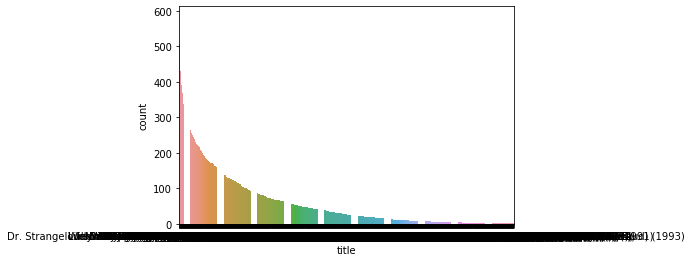

In [16]:
#Graficas
res= DS_peliculas_rating.groupBy('title').count().orderBy('count',ascending=False)
red=res.toPandas()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ax=sns.barplot(x="title", y="count", data=red)



In [17]:
# Peliculas con menos numero de visualizaciones 
DS_peliculas_rating.groupBy('title').count().orderBy('count',ascending=True).show(10,False)

+------------------------------------------+-----+
|title                                     |count|
+------------------------------------------+-----+
|Tigrero: A Film That Was Never Made (1994)|1    |
|Leopard Son, The (1996)                   |1    |
|Aiqing wansui (1994)                      |1    |
|Fear, The (1995)                          |1    |
|Mad Dog Time (1996)                       |1    |
|Target (1995)                             |1    |
|Lashou shentan (1992)                     |1    |
|Vie est belle, La (Life is Rosey) (1987)  |1    |
|Modern Affair, A (1995)                   |1    |
|Next Step, The (1995)                     |1    |
+------------------------------------------+-----+
only showing top 10 rows



In [20]:
# El cliente 100 y el 450 cold celd
DS_peliculas_rating.filter((DS_peliculas_rating['title']=='Star Wars (1977)')&(DS_peliculas_rating['userId']=='100')).show()

+------+-----+------+
|userId|title|rating|
+------+-----+------+
+------+-----+------+



# 3. FEature Engineering: Tansforma pelicula a numero



In [0]:
# Importando el codifocador
from pyspark.ml.feature import StringIndexer,IndexToString

In [0]:
# Configurando la Numerzación los titulos de las peliculas
# title_new = La codificación de las peliculas
stringIndexer = StringIndexer(inputCol="title", outputCol="title_new")

In [0]:
#Aplicando la numerización de peliculas
model = stringIndexer.fit(DS_peliculas_rating)

In [0]:
#Creando un nuevo Dataframe con el indexado creado
indexed = model.transform(DS_peliculas_rating)

In [25]:
#Revision de los indices
indexed.show(10)

+------+------------+------+---------+
|userId|       title|rating|title_new|
+------+------------+------+---------+
|   196|Kolya (1996)|     3|    287.0|
|    63|Kolya (1996)|     3|    287.0|
|   226|Kolya (1996)|     5|    287.0|
|   154|Kolya (1996)|     3|    287.0|
|   306|Kolya (1996)|     5|    287.0|
|   296|Kolya (1996)|     4|    287.0|
|    34|Kolya (1996)|     5|    287.0|
|   271|Kolya (1996)|     4|    287.0|
|   201|Kolya (1996)|     4|    287.0|
|   209|Kolya (1996)|     4|    287.0|
+------+------------+------+---------+
only showing top 10 rows



In [26]:
#Numero de veces que cada titulo ha aparecido
indexed.groupBy('title_new').count().orderBy('count',ascending=False).show(10,False)

+---------+-----+
|title_new|count|
+---------+-----+
|0.0      |583  |
|1.0      |509  |
|2.0      |508  |
|3.0      |507  |
|4.0      |485  |
|5.0      |481  |
|6.0      |478  |
|7.0      |452  |
|8.0      |431  |
|9.0      |429  |
+---------+-----+
only showing top 10 rows



# 4. Dividiendo la data en muestra de entrenamiento y validacion


In [0]:
#4.1  Data de entrenamiento y validacion
train,test=indexed.randomSplit([0.75,0.25],seed=1234)

In [28]:
# Nro de entrenamiento
train.count()

75078

In [29]:
# Nro de Validacion
test.count()

24922

# 5. Entrenando el Modelo


In [0]:
#Importando el modelo Recomendador ALS
from pyspark.sql.functions import *
from pyspark.ml.recommendation import ALS


In [0]:
#Configuracion del Entrenamiento del modelo Recomendador usando la muetsra de entrenamiento
rec=ALS(maxIter=10,regParam=0.06,userCol='userId',itemCol='title_new',ratingCol='rating',nonnegative=True,coldStartStrategy="drop",implicitPrefs=False,seed=1234)

# maxIter: El maximo de iteraciones
# regParam: Parametro de REgularización
# nonnegative: Especificar si se utiliza una restriccion negativa en los Minimos cuadrados
# coldStartStrategy: Parametro que elimina cualquier cliente que no tenga informacion
# implicitPrefs: Si es implicito hace referencia a feedback no registrado voluntariamente por el cliente

In [0]:
#Entrenando el modelo
rec_model=rec.fit(train)

In [0]:
#Haciendo las predicciones en la data de test 
predicted_ratings=rec_model.transform(test)

In [71]:
#Revisando los pronostico
predicted_ratings.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- rating: integer (nullable = true)
 |-- title_new: double (nullable = false)
 |-- prediction: float (nullable = false)



In [72]:
# Revision rapida de los pronosticos
predicted_ratings.orderBy(rand()).show(10)

+------+--------------------+------+---------+----------+
|userId|               title|rating|title_new|prediction|
+------+--------------------+------+---------+----------+
|   881|      Tin Men (1987)|     3|    595.0| 2.9307306|
|   886|         Dave (1993)|     3|    138.0| 3.6347651|
|    25|Gone with the Win...|     3|    159.0| 3.9887276|
|   373|    Rock, The (1996)|     4|     17.0| 3.8762014|
|   264|English Patient, ...|     2|      5.0| 4.2748046|
|   798|Mrs. Doubtfire (1...|     3|    126.0| 3.3855822|
|   363|So I Married an A...|     5|    350.0|  2.764937|
|   577|    Cape Fear (1991)|     3|    161.0| 3.3943968|
|   495|       Psycho (1960)|     5|     78.0| 3.8249836|
|   243| Forrest Gump (1994)|     3|     27.0|  3.361583|
+------+--------------------+------+---------+----------+
only showing top 10 rows



In [0]:
# Generando los top 10 peliculas sugeridas por cada cliente
userRecs = rec_model.recommendForAllUsers(10)

In [74]:
userRecs.show(5,False)

+------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|userId|recommendations                                                                                                                                                                  |
+------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|471   |[[997, 6.727196], [837, 6.598546], [1416, 6.303671], [1103, 6.211901], [1178, 6.12811], [842, 6.0663757], [857, 6.046172], [1403, 5.966725], [1018, 5.868697], [752, 5.764452]]  |
|463   |[[1432, 4.860839], [961, 4.7913737], [829, 4.7079735], [966, 4.3514843], [698, 4.3363585], [221, 4.335935], [1100, 4.325286], [54, 4.3174977], [540, 4.2937202], [661, 4.283081]]|
|833   |[[1383, 5.0000024], [1066, 4.885663], [992, 4.8503995], [

# 5. Evaluación del poder predictivo del modelo


In [75]:
# Creando la columna diferencia del pronostico
predicted_ratings_witherr=predicted_ratings.withColumn('err',abs(predicted_ratings.prediction - predicted_ratings.rating))

predicted_ratings_witherr.show()

+------+--------------------+------+---------+----------+-----------+
|userId|               title|rating|title_new|prediction|        err|
+------+--------------------+------+---------+----------+-----------+
|    53|That Thing You Do...|     3|    148.0| 3.7628808|  0.7628808|
|   193|That Thing You Do...|     4|    148.0|  3.498962|  0.5010381|
|   332|That Thing You Do...|     3|    148.0|   4.04764|  1.0476398|
|   501|That Thing You Do...|     3|    148.0| 3.5011878|  0.5011878|
|   159|That Thing You Do...|     1|    148.0|  3.551576|   2.551576|
|   223|That Thing You Do...|     4|    148.0| 3.1276946|  0.8723054|
|   711|That Thing You Do...|     4|    148.0| 3.3718107|  0.6281893|
|   152|That Thing You Do...|     3|    148.0| 4.5174246|  1.5174246|
|   665|That Thing You Do...|     4|    148.0| 3.2335057|  0.7664943|
|   185|That Thing You Do...|     4|    148.0| 3.2481263| 0.75187373|
|   305|That Thing You Do...|     3|    148.0| 2.9091332|0.090866804|
|   747|That Thing Y

In [76]:
# Distribución de las valoraciones
predicted_ratings.groupBy('rating').count().orderBy('rating',ascending=True).show()

+------+-----+
|rating|count|
+------+-----+
|     1| 1545|
|     2| 2808|
|     3| 6744|
|     4| 8443|
|     5| 5323|
+------+-----+



In [77]:
# Error promedio por rating de valoracion
predicted_ratings_witherr.groupBy('rating').agg({'err':'mean'}).orderBy('rating',ascending=True).show()

+------+------------------+
|rating|          avg(err)|
+------+------------------+
|     1|1.5016477835216955|
|     2|0.9589208558074429|
|     3|0.5210911394544343|
|     4|0.5278119233269326|
|     5|1.0242155322494664|
+------+------------------+



In [78]:
# Error promedio por rating de valoracion
predicted_ratings_witherr.groupBy('rating').agg({'err':'std'}).orderBy('rating',ascending=True).show()

+------+------------------+
|rating|       stddev(err)|
+------+------------------+
|     1|0.7941813633752405|
|     2|0.5952330859207445|
|     3|0.3870478977812408|
|     4|0.4313960131507309|
|     5|0.5693206674279743|
+------+------------------+



In [0]:
#Importando el evaluador de Regresion RMSE 
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
#Evluando la presición del pronostico
evaluator=RegressionEvaluator(metricName='rmse',predictionCol='prediction',labelCol='rating')

In [0]:
#Evluando el error de pronostico global
rmse=evaluator.evaluate(predicted_ratings)

In [82]:
#Imprimiento el error
print(rmse)

0.9429652481131455


# 6. Recomendandor de peliculas, ya listo!

In [0]:
#Listado de peliculas unicas
unique_movies=indexed.select('title_new').distinct()

In [84]:
#Total de peliculas
unique_movies.count()

1664

In [0]:
#Asignando un alias {a} la lista unica de peliculas
a = unique_movies.alias('a')

In [86]:
# Eligiendo un cliente
user_id=100

# Creando una tabla que contiene una pelicula por usuario
watched_movies=indexed.filter(indexed['userId'] == user_id).select('title_new').distinct()

#Numero de peliculas ya evaluadas 
watched_movies.count()

59

In [0]:
# Asignando un alias  {b} ha peliculas que el usuario ya vio de la tabla
b=watched_movies.alias('b')

In [0]:
#Cruzando ambas tablas
total_movies = a.join(b, a.title_new == b.title_new,how='left')

In [90]:
total_movies.show(45,False)

+---------+---------+
|title_new|title_new|
+---------+---------+
|558.0    |null     |
|305.0    |null     |
|299.0    |null     |
|596.0    |null     |
|769.0    |null     |
|934.0    |null     |
|496.0    |null     |
|1051.0   |null     |
|692.0    |null     |
|810.0    |null     |
|720.0    |null     |
|782.0    |null     |
|184.0    |null     |
|147.0    |null     |
|576.0    |null     |
|170.0    |null     |
|1369.0   |null     |
|1587.0   |null     |
|169.0    |169.0    |
|608.0    |null     |
|735.0    |null     |
|160.0    |null     |
|379.0    |null     |
|311.0    |null     |
|70.0     |null     |
|486.0    |null     |
|67.0     |null     |
|8.0      |8.0      |
|878.0    |null     |
|571.0    |null     |
|1350.0   |null     |
|994.0    |null     |
|1584.0   |null     |
|1622.0   |null     |
|168.0    |null     |
|818.0    |null     |
|702.0    |null     |
|1095.0   |null     |
|69.0     |null     |
|0.0      |null     |
|206.0    |null     |
|524.0    |null     |
|758.0    

In [0]:
# Seleccionando peliculas que el cliente aun no ha mirado
remaining_movies=total_movies.where(col("b.title_new").isNull()).select(a.title_new).distinct()

In [92]:
remaining_movies.show()

+---------+
|title_new|
+---------+
|    558.0|
|    305.0|
|    299.0|
|    596.0|
|    769.0|
|    934.0|
|    496.0|
|   1051.0|
|    692.0|
|    810.0|
|    720.0|
|    782.0|
|    184.0|
|    147.0|
|    576.0|
|    170.0|
|   1369.0|
|   1587.0|
|    608.0|
|    735.0|
+---------+
only showing top 20 rows



In [93]:
# Numero de peliculas que los usuario aun no lo ven 
remaining_movies.count()

1605

In [0]:
# Agregando una nueva columna del usuario 
remaining_movies=remaining_movies.withColumn("userId",lit(int(user_id)))

In [95]:
remaining_movies.show(10,False)

+---------+------+
|title_new|userId|
+---------+------+
|558.0    |100   |
|305.0    |100   |
|299.0    |100   |
|596.0    |100   |
|769.0    |100   |
|934.0    |100   |
|496.0    |100   |
|1051.0   |100   |
|692.0    |100   |
|810.0    |100   |
+---------+------+
only showing top 10 rows



In [0]:
# Haciendo la recomendacion de peliculas utilizando el modelo recomendador ALS y seleccionado solo las mejores top {n} peliculas
recommendations=rec_model.transform(remaining_movies).orderBy('prediction',ascending=False)

In [97]:
recommendations.show(5,False)

+---------+------+----------+
|title_new|userId|prediction|
+---------+------+----------+
|1372.0   |100   |5.1377954 |
|829.0    |100   |4.932546  |
|917.0    |100   |4.5561285 |
|1334.0   |100   |4.4910426 |
|774.0    |100   |4.481372  |
+---------+------+----------+
only showing top 5 rows



In [0]:
# Consiguiendo los de las peliculas sugeridas
movie_title = IndexToString(inputCol="title_new", outputCol="title",labels=model.labels)

final_recommendations=movie_title.transform(recommendations)

In [99]:
final_recommendations.show(10,False)

+---------+------+----------+----------------------------+
|title_new|userId|prediction|title                       |
+---------+------+----------+----------------------------+
|1372.0   |100   |5.1377954 |Schizopolis (1996)          |
|829.0    |100   |4.932546  |My Man Godfrey (1936)       |
|917.0    |100   |4.5561285 |It's My Party (1995)        |
|1334.0   |100   |4.4910426 |Story of Xinghua, The (1993)|
|774.0    |100   |4.481372  |Brassed Off (1996)          |
|1061.0   |100   |4.471089  |Dangerous Beauty (1998)     |
|907.0    |100   |4.432412  |Oscar & Lucinda (1997)      |
|1204.0   |100   |4.432011  |A Chef in Love (1996)       |
|638.0    |100   |4.4265466 |Shall We Dance? (1996)      |
|26.0     |100   |4.398895  |Princess Bride, The (1987)  |
+---------+------+----------+----------------------------+
only showing top 10 rows



# 7. Construyendo las funcion que sugiera una pelicula recomendada segun el modelo recomendador

In [0]:
# Funcion para recomendar las top n peliculas para cualquier usuario
def top_movies(user_id,n):
    """
    This function returns the top 'n' movies that user has not seen yet but might like 
    
    """
    # Asignación de una lista de peliculas unicas a
    a = unique_movies.alias('a')
    
    # Creando otra tabla que contiene las peliculas que ya vio el usuario
    watched_movies=indexed.filter(indexed['userId'] == user_id).select('title_new')
    
    # Asignanción de tabla de peliculas b de peliculas ya vistas 
    b=watched_movies.alias('b')
    
    # Cruce de ambas tablas
    total_movies = a.join(b, a.title_new == b.title_new,how='left')
    
    # Seleccionando peliculas que el usuario no ha visto aun 
    remaining_movies=total_movies.where(col("b.title_new").isNull()).select(a.title_new).distinct()
        
    #Agregando una nueva columan del cliente  
    remaining_movies=remaining_movies.withColumn("userId",lit(int(user_id)))
    
    # REalizando la recomendnado de peliculas mas adecuada utilizando el Sistema de recomendador del modelo ALS y seleccionando las mejores peliculas
    recommendations=rec_model.transform(remaining_movies).orderBy('prediction',ascending=False).limit(n)

    # Agregando los titulos de las peliculas en texto   
    movie_title = IndexToString(inputCol="title_new", outputCol="title",labels=model.labels)
    final_recommendations=movie_title.transform(recommendations)
    
    # Entregando los titutlos recomendado por usuario
    return final_recommendations.show(n,False)


In [106]:
# REvision del clientes y las 10 peliculas sugeridas para el cliente
top_movies(232,15)

+---------+------+----------+---------------------------------------------------------------------------------+
|title_new|userId|prediction|title                                                                            |
+---------+------+----------+---------------------------------------------------------------------------------+
|1308.0   |232   |5.2944517 |Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)|
|1264.0   |232   |5.209042  |World of Apu, The (Apur Sansar) (1959)                                           |
|696.0    |232   |4.9416347 |Priest (1994)                                                                    |
|1195.0   |232   |4.898599  |Pather Panchali (1955)                                                           |
|1057.0   |232   |4.872248  |Boys of St. Vincent, The (1993)                                                  |
|1277.0   |232   |4.847436  |Duoluo tianshi (1995)                                                      

In [104]:
# El cliente 450 que revisa Star Wars
DS_peliculas_rating.filter((DS_peliculas_rating['rating']>4)&(DS_peliculas_rating['userId']=='450')).show()

+------+--------------------+------+
|userId|               title|rating|
+------+--------------------+------+
|   450|L.A. Confidential...|     5|
|   450|Dr. Strangelove o...|     5|
|   450|Hunt for Red Octo...|     5|
|   450|Age of Innocence,...|     5|
|   450|     Die Hard (1988)|     5|
|   450|Right Stuff, The ...|     5|
|   450|Sleepless in Seat...|     5|
|   450|   Sting, The (1973)|     5|
|   450|  Rear Window (1954)|     5|
|   450|Dead Poets Societ...|     5|
|   450|Sound of Music, T...|     5|
|   450|E.T. the Extra-Te...|     5|
|   450|Brothers McMullen...|     5|
|   450|To Kill a Mocking...|     5|
|   450|   Old Yeller (1957)|     5|
|   450|Jerry Maguire (1996)|     5|
|   450|     Backbeat (1993)|     5|
|   450|  Taxi Driver (1976)|     5|
|   450|Young Frankenstei...|     5|
|   450|It's a Wonderful ...|     5|
+------+--------------------+------+
only showing top 20 rows



In [105]:
# REvision del clientes y las 10 peliculas sugeridas para el cliente
top_movies(450,15)

+---------+------+----------+---------------------------------------------------------------------------------+
|title_new|userId|prediction|title                                                                            |
+---------+------+----------+---------------------------------------------------------------------------------+
|1308.0   |450   |5.859014  |Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)|
|1432.0   |450   |5.395659  |Boys, Les (1997)                                                                 |
|1468.0   |450   |5.0465865 |Anna (1996)                                                                      |
|1195.0   |450   |4.985433  |Pather Panchali (1955)                                                           |
|1470.0   |450   |4.9475985 |Some Mother's Son (1996)                                                         |
|1578.0   |450   |4.8335037 |They Made Me a Criminal (1939)                                             